In [7]:
import cv2
import os
import numpy as np
import random
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


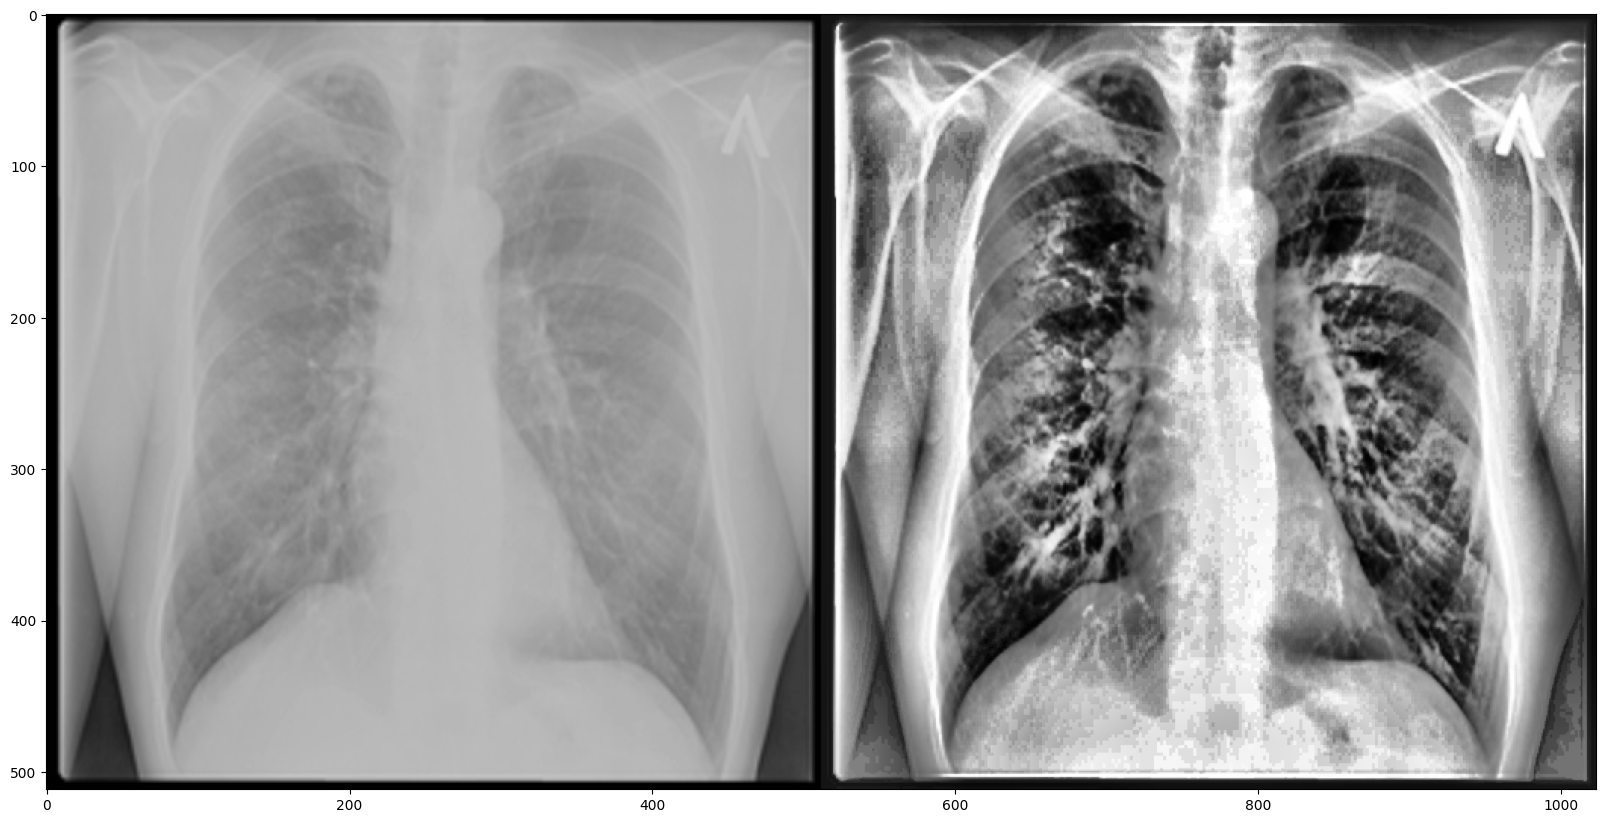

In [51]:
import cv2

p1 = 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-21.png'

def equalize_histogram(img):
    img_eq = cv2.equalizeHist(img)
    return img_eq


img = cv2.imread(p1, cv2.IMREAD_GRAYSCALE)


img_eq = equalize_histogram(img)
clahe=cv2.createCLAHE(clipLimit=20)
eg=clahe.apply(img_eq)
eqhist_images=np.concatenate((img,eg),axis=1)
plt.figure(figsize=(20,20))
plt.imshow(eqhist_images,cmap="gray")
plt.show()

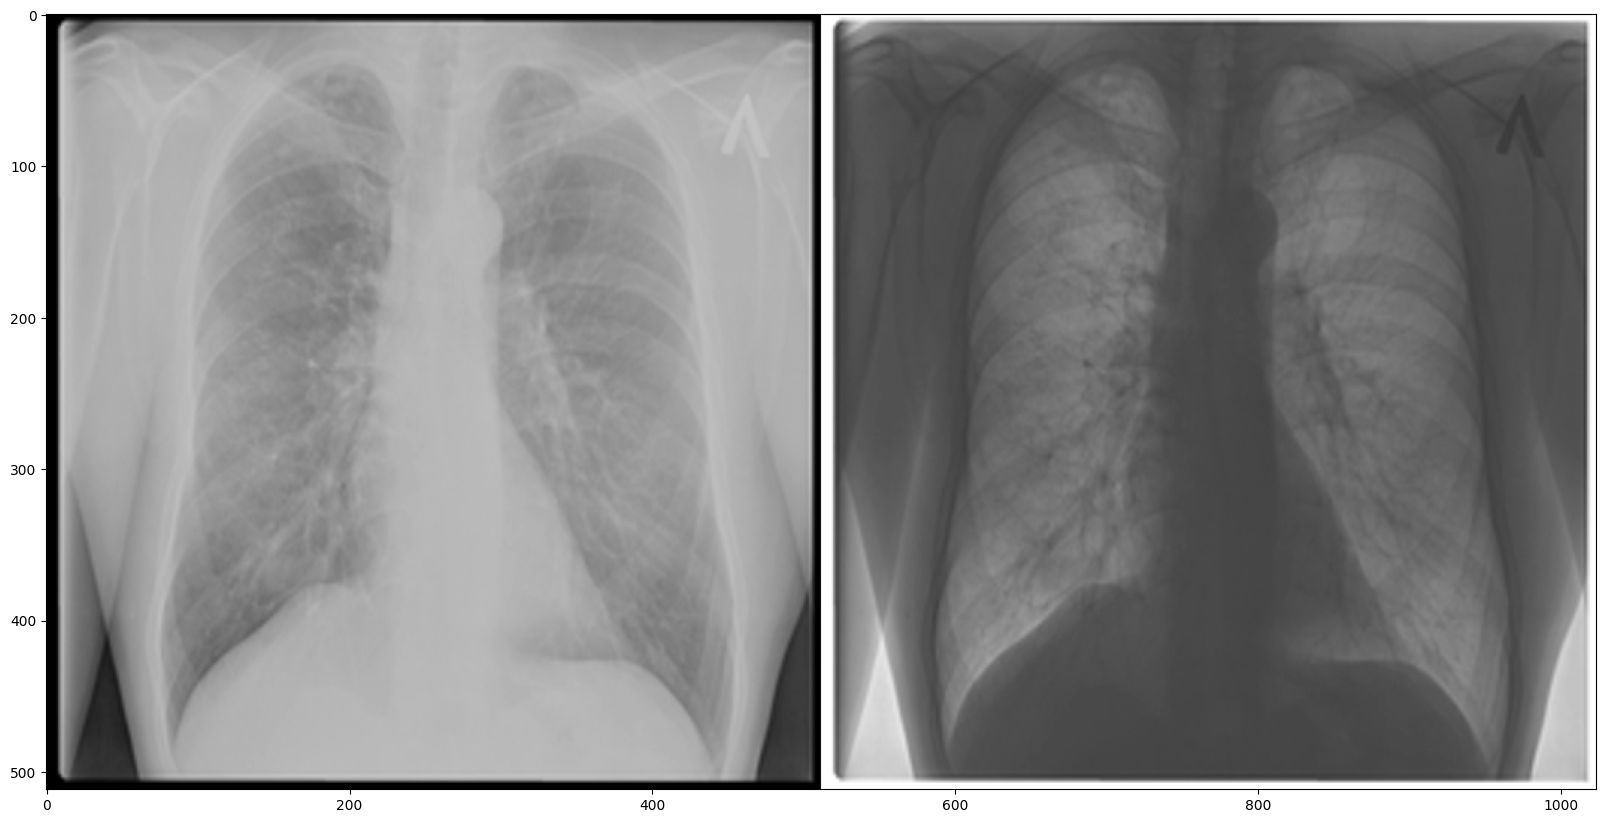

In [35]:

ic = cv2.bitwise_not(img)
eqhist_images=np.concatenate((img,ic),axis=1)
plt.figure(figsize=(20,20))
plt.imshow(eqhist_images,cmap="gray")
plt.show()

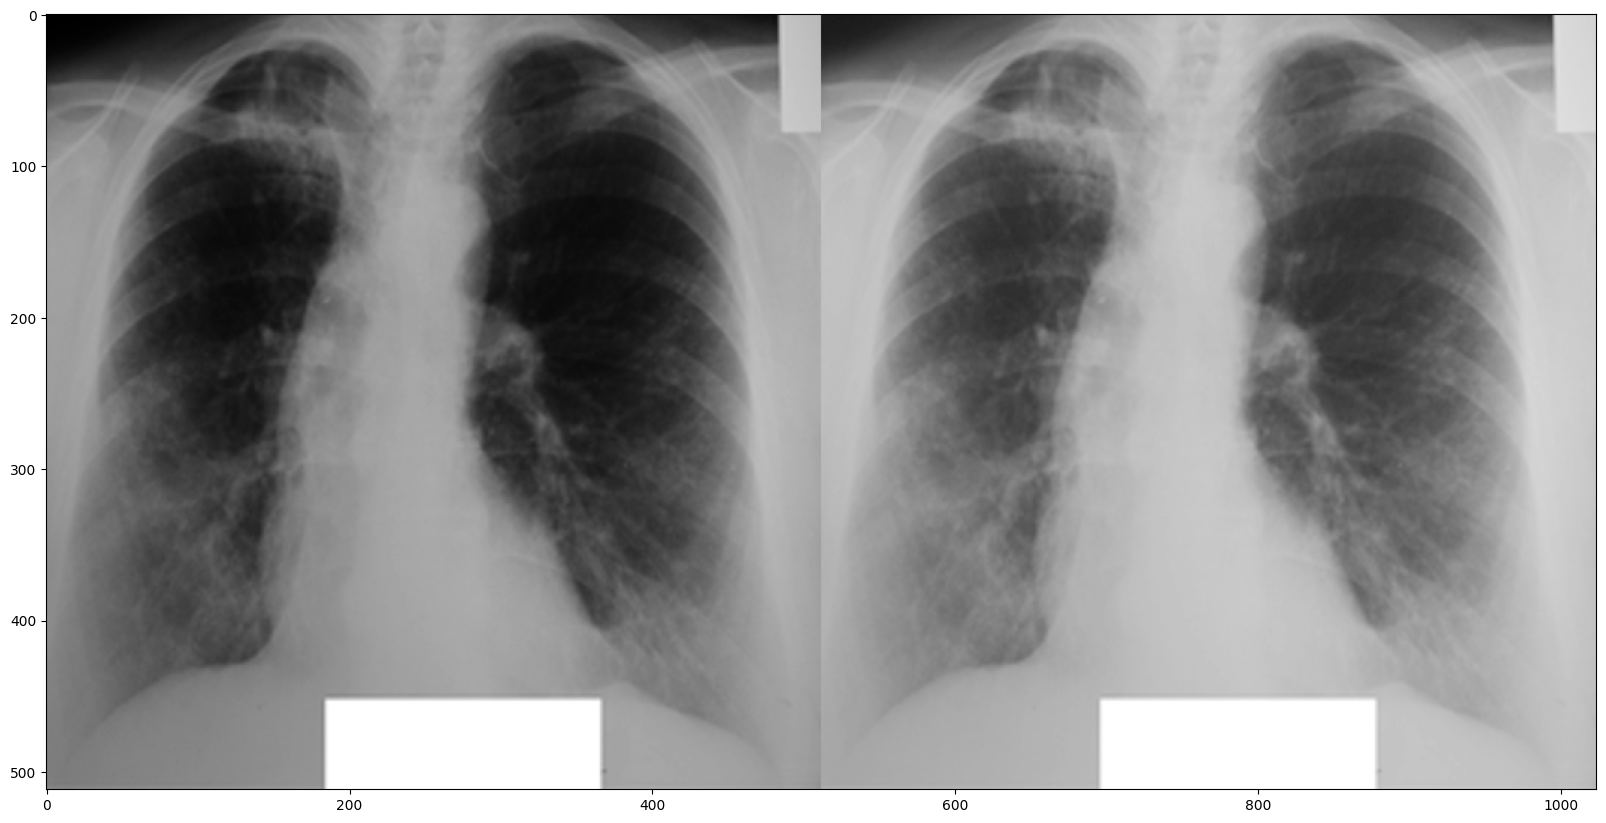

In [25]:

img_path = 'TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-1.png'
img = cv2.imread(img_path)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img/255.0
im_power_law_transformation = cv2.pow(gray_img, 0.6)

plt.figure(figsize=(20,20))
plt.imshow(np.hstack((gray_img*255, im_power_law_transformation*255)),cmap='gray')
plt.show()

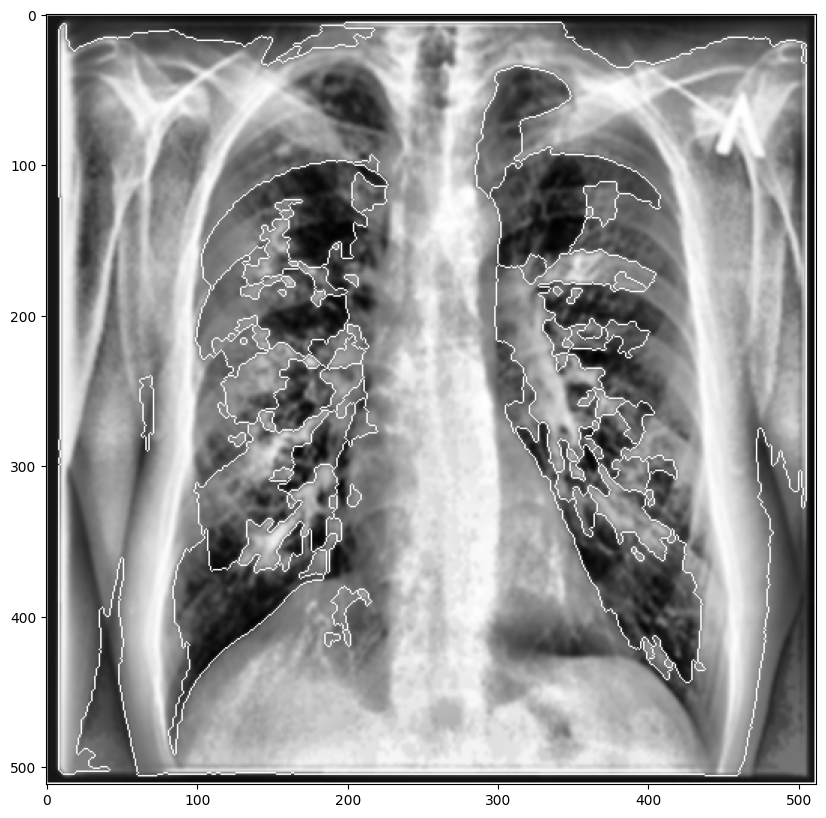

In [52]:
img_eq = cv2.equalizeHist(img)
eg= cv2.GaussianBlur(eg, (5,5), 0)
_, thresh = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)

# Threshold eg image to obtain a binary image
_, binary_eg = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

_, markers = cv2.connectedComponents(binary_eg)
markers = markers + 1
markers[unknown==255] = 0

# Convert eg to 3-channel image
eg = cv2.cvtColor(eg, cv2.COLOR_GRAY2BGR)

markers = cv2.watershed(eg, markers)
eg[markers == -1] = 255

plt.figure(figsize=(10,10))
plt.imshow(eg,cmap="gray")
plt.show()


In [57]:

image_dir = 'TB_Chest_Radiography_Database/Tuberculosis'
output_dir = 'turberculoseC'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

image_files = os.listdir(image_dir)

for imag_file in image_files:
    imag_P = os.path.join(image_dir,imag_file)
    

    if img is None:
        print("Erro")
        continue

    #img_Red = cv2.resize(img, (0, 0), fx=0.6, fy=0.6)
    #img_g = cv2.GaussianBlur(img_Red, (5, 5), 0)
    #gray = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY)
    #thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    #kernel = np.ones((3, 3), np.uint8)
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    #contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    img = cv2.imread(imag_P, cv2.IMREAD_GRAYSCALE)
    eg = cv2.equalizeHist(img)
    clahe=cv2.createCLAHE(clipLimit=5)
    eg=clahe.apply(eg)
    eg= cv2.GaussianBlur(eg, (5,5), 0)
    _, thresh = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(thresh, sure_fg)

    # Threshold eg image to obtain a binary image
    _, binary_eg = cv2.threshold(eg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    _, markers = cv2.connectedComponents(binary_eg)
    markers = markers + 1
    markers[unknown==255] = 0

    # Convert eg to 3-channel image
    eg = cv2.cvtColor(eg, cv2.COLOR_GRAY2BGR)

    markers = cv2.watershed(eg, markers)
    eg[markers == -1] = 255

    output_file = os.path.join(output_dir, f'resized_{imag_file}')
    cv2.imwrite(output_file, eg)


    # img_Red=cv2.resize(img,(0,0), fx=0.6, fy=0.6)
    # #plt.imshow(img_Red)
    # img_g= cv2.GaussianBlur(img_Red,(5,5),0)
    # #plt.imshow(img_g)
    # gray = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # kernel = np.ones((3,3),np.uint8)
    # erosion = cv2.erode(thresh,kernel,iterations = 1)
    # dilation = cv2.dilate(erosion,kernel,iterations = 1)
    # contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img, contours, -1, (0,255,0), 2)
    # output_file = os.path.join(output_dir, f'resized_{imag_file}')
    # cv2.imwrite(output_file,dilation)



In [58]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [59]:
import os
import random
import shutil

# Definindo diretórios
p1 = 'turberculoseC'
p2 = 'turberculoseN'
train_dir = 'train'
validation_dir = 'validation'

# Criando as pastas train e validation
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

# Definindo o tamanho do conjunto de treino e validação
train_size = 0.7
validation_size = 0.3

# Mesclando as imagens das pastas p1 e p2 de forma aleatória
images = []
for img_name in os.listdir(p1):
    images.append((os.path.join(p1, img_name), 1))
for img_name in os.listdir(p2):
    images.append((os.path.join(p2, img_name), 0))
random.shuffle(images)

# Copiando as imagens mescladas para as pastas train e validation
for i, (image_path, label) in enumerate(images):
    if i < len(images) * train_size:
        dst_dir = os.path.join(train_dir, str(label))
    else:
        dst_dir = os.path.join(validation_dir, str(label))
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    shutil.copy(image_path, os.path.join(dst_dir, os.path.basename(image_path)))


In [60]:
#Definindo diretórios
train_dir = 'train'
validation_dir = 'validation'

# Definindo número de classes e tamanho das imagens
num_classes = 2
img_width, img_height = 224, 224

# Definindo o tamanho do batch de imagens a ser utilizado no treinamento
batch_size = 30

# Definindo geradores de imagens para treinamento e validação com aumento de dados
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Criando geradores de imagens a partir dos diretórios
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=(img_width, img_height),
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

# Definindo a arquitetura da ResNet50 com pesos pré-treinados no ImageNet
resnet_model = ResNet50(include_top=False, weights='imagenet',
                        input_shape=(img_width, img_height, 3))

# Congelando as camadas convolucionais da ResNet50
for layer in resnet_model.layers:
    layer.trainable = False

# Adicionando camadas densas para classificação
x = resnet_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Definindo o modelo final
model = tf.keras.models.Model(inputs=resnet_model.input, outputs=output)

# Compilando o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size)

# Avaliando o modelo na validação
scores = model.evaluate(validation_generator)
print(f'Acurácia na validação: {scores[1]*100}%')

# Salvando o modelo treinado
model.save('tb_detection.h5')

Found 2940 images belonging to 2 classes.
Found 1260 images belonging to 2 classes.
Epoch 1/25
98/98 [==============================] - 158s 2s/step - loss: 3.8057 - accuracy: 0.7690 - val_loss: 0.3966 - val_accuracy: 0.8413
Epoch 2/25
98/98 [==============================] - 157s 2s/step - loss: 0.4445 - accuracy: 0.8299 - val_loss: 0.3279 - val_accuracy: 0.8468
Epoch 3/25
98/98 [==============================] - 158s 2s/step - loss: 0.4146 - accuracy: 0.8286 - val_loss: 0.3156 - val_accuracy: 0.8421
Epoch 4/25
98/98 [==============================] - 157s 2s/step - loss: 0.4265 - accuracy: 0.8306 - val_loss: 0.4057 - val_accuracy: 0.8619
Epoch 5/25
98/98 [==============================] - 157s 2s/step - loss: 0.4370 - accuracy: 0.8310 - val_loss: 0.3207 - val_accuracy: 0.8413
Epoch 6/25
98/98 [==============================] - 157s 2s/step - loss: 0.4229 - accuracy: 0.8299 - val_loss: 0.3504 - val_accuracy: 0.8413
Epoch 7/25
98/98 [==============================] - 157s 2s/step - los